In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataclustering/pertanianclustering.csv
/kaggle/input/dataclustering/pertanianemitten.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
from scipy import stats

In [3]:
df0 = pd.read_csv('../input/dataclustering/pertanianclustering.csv')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Emitten                  19 non-null     object 
 1   DER                      19 non-null     float64
 2   Operating Profit Margin  19 non-null     float64
 3   sales growth             19 non-null     object 
 4   return of asset          19 non-null     float64
 5   Category                 0 non-null      float64
dtypes: float64(4), object(2)
memory usage: 1.0+ KB


In [4]:
df0.describe()

,DER,Operating Profit Margin,return of asset,Category
count,19.000000,19.000000,19.000000,0.0
mean,1.677137,-0.033534,0.033923,NaN
std,2.615720,0.572822,0.119803,NaN
min,-1.322743,-2.007213,-0.178472,NaN
25%,0.443561,-0.013364,-0.040850,NaN
50%,0.758859,0.150501,0.043147,NaN
75%,1.542588,0.231707,0.073551,NaN
max,10.614012,0.458206,0.405886,NaN


In [5]:
df0.drop(["Emitten","Category"], axis=1, inplace=True)

<Figure size 1080x1080 with 0 Axes>

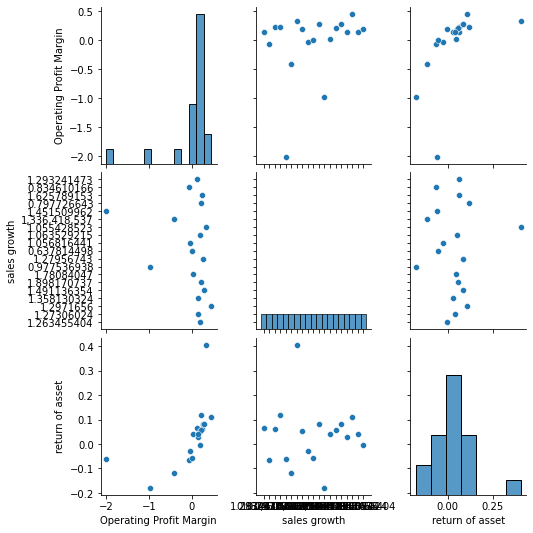

In [6]:
plt.figure(figsize=(15, 15))
sns.pairplot(df0, vars = df0.columns[1:13]);

In [7]:
df0 = pd.read_csv('../input/dataclustering/pertanianclustering.csv')
df1 = df0[['DER','Operating Profit Margin' ,'sales growth','return of asset','Category']]
df1.describe

<bound method NDFrame.describe of           DER  Operating Profit Margin   sales growth  return of asset  \
0    0.135154                 0.135154    1.293241473         0.064848   
1    0.758859                -0.064557    0.834610166        -0.064974   
2    0.395062                 0.236027    1.625789153         0.061328   
3    0.000624                 0.227386    0.797726643         0.119392   
4    1.239184                -2.007213    1.451509962        -0.059932   
5    3.517208                -0.412206  1,336,418,537        -0.116518   
6    5.083353                 0.331290    1.055428523         0.405886   
7    0.755672                 0.193574    1.063529215         0.053030   
8    0.624000                -0.031987    1.056816441        -0.026476   
9   10.614012                 0.005259    0.637814498        -0.055224   
10   0.000834                 0.275624     1.27956743         0.083640   
11   3.570709                -0.980925    0.977536938        -0.178472   
12  

<AxesSubplot:xlabel='Emitten', ylabel='Operating Profit Margin'>

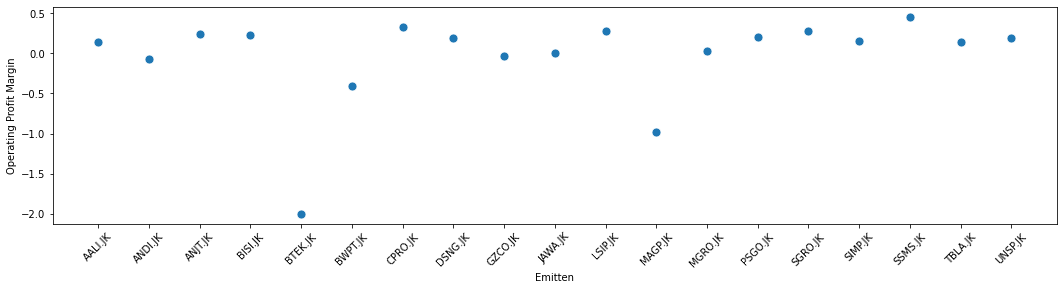

In [8]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='Operating Profit Margin', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emitten', ylabel='DER'>

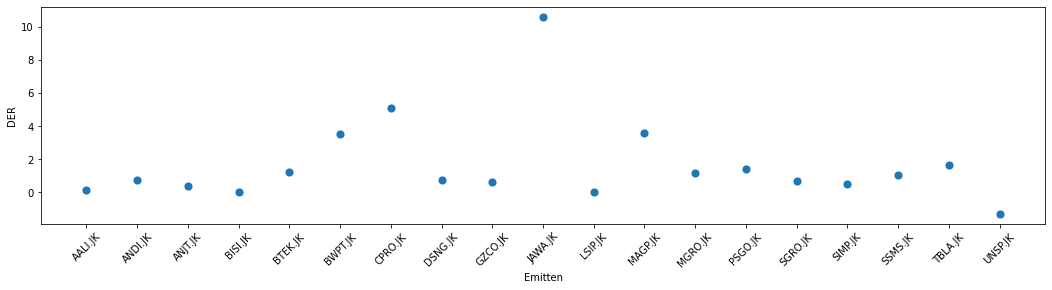

In [9]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='DER', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emitten', ylabel='sales growth'>

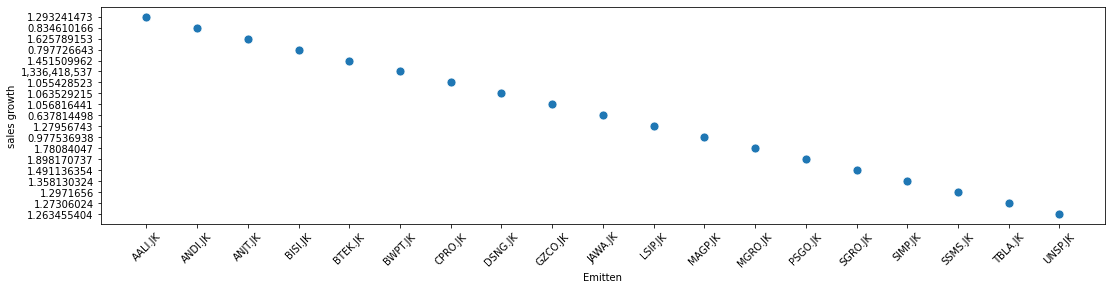

In [10]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='sales growth', 
                data=df0, s=80)

In [11]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([False] * len(df1))
for col in ['Operating Profit Margin']:
    zscore = abs(stats.zscore(df1[col]))
    filtered_entries = (zscore < 3) | filtered_entries
    
df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 19
Jumlah baris setelah memfilter outlier: 18


In [12]:
df1.describe()

,DER,Operating Profit Margin,return of asset,Category
count,18.000000,18.000000,18.000000,0.0
mean,1.701468,0.076115,0.039138,NaN
std,2.689341,0.324893,0.121038,NaN
min,-1.322743,-0.980925,-0.178472,NaN
25%,0.419312,0.009941,-0.020837,NaN
50%,0.757266,0.172038,0.048089,NaN
75%,1.593823,0.233867,0.077902,NaN
max,10.614012,0.458206,0.405886,NaN


In [13]:
feats = ['DER','Operating Profit Margin','return of asset']
X = df1[feats].values
y = df1['Category'].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.describe()

,DER,Operating Profit Margin,return of asset
count,1.800000e+01,1.800000e+01,1.800000e+01
mean,-2.467162e-17,4.625929e-17,2.158767e-17
std,1.028992e+00,1.028992e+00,1.028992e+00
min,-1.157119e+00,-3.347827e+00,-1.849993e+00
25%,-4.905768e-01,-2.095839e-01,-5.098703e-01
50%,-3.612694e-01,3.038043e-01,7.609588e-02
75%,-4.118713e-02,4.996275e-01,3.295530e-01
max,3.410104e+00,1.210151e+00,3.117884e+00


In [14]:
from sklearn.cluster import KMeans
wcss=[]

In [15]:
df0.shape

(19, 6)

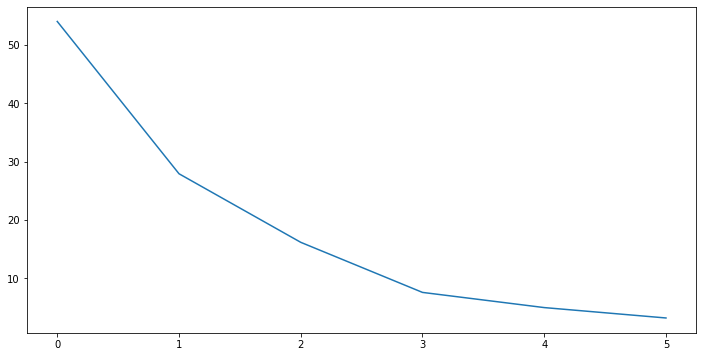

In [16]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 7):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(new_df.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(inertia) #Elbow Method

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_df.values)

KMeans(n_clusters=3, random_state=0)

In [18]:
new_df['target'] = y
new_df['fit'] = kmeans.labels_


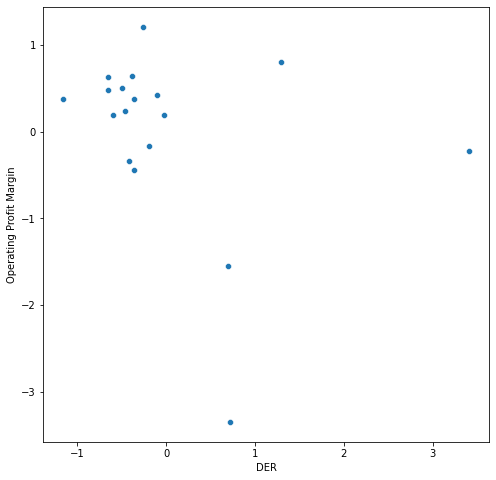

In [19]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.scatterplot(x='DER', y='Operating Profit Margin', hue=new_df.target.to_list(), data=new_df);

In [20]:
new_df.head(5)

,DER,Operating Profit Margin,return of asset,target,fit
0,-0.599301,0.186989,0.218572,NaN,0
1,-0.360660,-0.445530,-0.885094,NaN,0
2,-0.499855,0.506469,0.188653,NaN,0
3,-0.650775,0.479104,0.682278,NaN,0
4,0.694736,-1.546598,-1.323296,NaN,1


In [21]:
new_df.insert(0,"Category",np.nan,True)
new_df.loc[new_df['fit'] == 0, 'Category'] = 2
new_df.loc[new_df['fit'] == 1, 'Category'] = 4
new_df.loc[new_df['fit'] == 2, 'Category'] = 1
new_df.loc[new_df['fit'] == 3, 'Category'] = 0
new_df.loc[new_df['fit'] == 4, 'Category'] = 3
new_df['Category'] = new_df['Category'].astype(int)
new_df.head(5)

,Category,DER,Operating Profit Margin,return of asset,target,fit
0,2,-0.599301,0.186989,0.218572,NaN,0
1,2,-0.360660,-0.445530,-0.885094,NaN,0
2,2,-0.499855,0.506469,0.188653,NaN,0
3,2,-0.650775,0.479104,0.682278,NaN,0
4,4,0.694736,-1.546598,-1.323296,NaN,1


In [22]:
new_df.drop(["fit","target"], axis=1, inplace=True)
new_df.columns = ['Category','DER (St.)','Operating Profit Margin (St.)', 'sales growth (St.)']
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       18 non-null     int64  
 1   DER (St.)                      18 non-null     float64
 2   Operating Profit Margin (St.)  18 non-null     float64
 3   sales growth (St.)             18 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 704.0 bytes


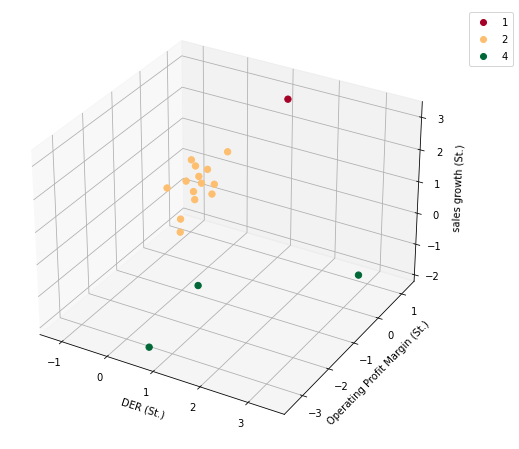

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = new_df['DER (St.)']
y = new_df['Operating Profit Margin (St.)']
z = new_df['sales growth (St.)']

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("sales growth (St.)")

cmap = ListedColormap(sns.color_palette("RdYlGn", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=new_df['Category'], marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

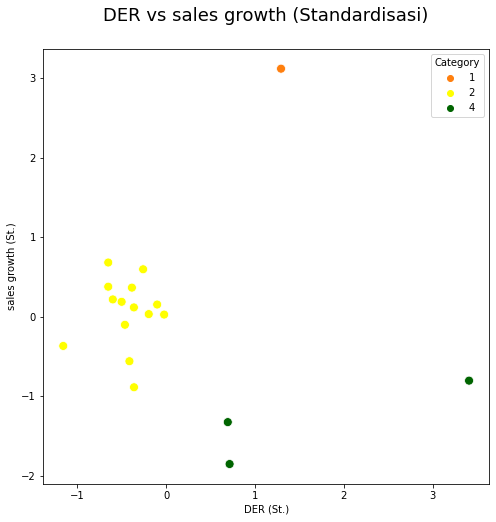

In [24]:
# color palette as dictionary
palette = {0:"tab:red",
           1:"tab:orange", 
           2:"yellow",
           3:"lime",
           4:"darkgreen"}

sns.scatterplot(x='DER (St.)', y='sales growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs sales growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

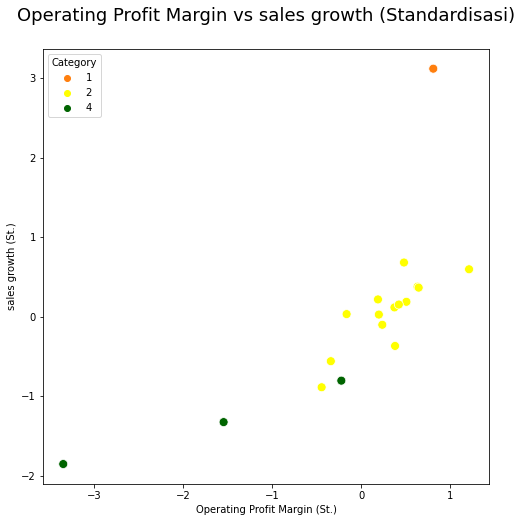

In [25]:
sns.scatterplot(x='Operating Profit Margin (St.)', y='sales growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("Operating Profit Margin vs sales growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

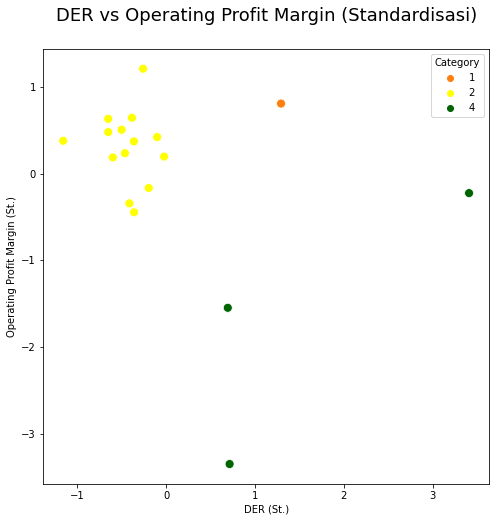

In [26]:
sns.scatterplot(x='DER (St.)', y='Operating Profit Margin (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Operating Profit Margin (Standardisasi)", fontsize=18, y=1.05)
plt.show()

In [27]:
# drop these row indexes
# from dataFrame
index_names = df0[ df0['Emitten'] == 'ARTO' ].index
df0.drop(index_names, inplace = True)
df0.reset_index(drop=True, inplace=True)
df0.drop(["Category"
         ], axis=1, inplace=True)

In [28]:
dftemp = pd.read_csv('../input/dataclustering/pertanianemitten.csv')
df = pd.concat([dftemp, new_df, df0], axis=1)
df.head(6)

,Industry,Company,Category,DER (St.),Operating Profit Margin (St.),sales growth (St.),Emitten,DER,Operating Profit Margin,sales growth,return of asset
0,Pertanian,PT Astra Agro Lestari Tbk (AALI.JK),2.0,-0.599301,0.186989,0.218572,AALI.JK,0.135154,0.135154,1.293241473,0.064848
1,Pertanian,"PT. Andira Agro, Tbk (ANDI.JK)",2.0,-0.360660,-0.445530,-0.885094,ANDI.JK,0.758859,-0.064557,0.834610166,-0.064974
2,Pertanian,PT Austindo Nusantara Jaya Tbk (ANJT.JK),2.0,-0.499855,0.506469,0.188653,ANJT.JK,0.395062,0.236027,1.625789153,0.061328
3,Pertanian,PT BISI International Tbk (BISI.JK),2.0,-0.650775,0.479104,0.682278,BISI.JK,0.000624,0.227386,0.797726643,0.119392
4,Pertanian,PT Bumi Teknokultura Unggul Tbk (BTEK.JK),4.0,0.694736,-1.546598,-1.323296,BTEK.JK,1.239184,-2.007213,1.451509962,-0.059932
5,Pertanian,PT Eagle High Plantations Tbk (BWPT.JK),1.0,1.293972,0.808185,3.117884,BWPT.JK,3.517208,-0.412206,"1,336,418,537",-0.116518


In [29]:
df.to_csv('result.csv', index = False)

In [30]:
kmeans.cluster_centers_

array([[-0.43671556,  0.30790365,  0.06125829],
       [ 1.60668209, -1.70627884, -1.32516684],
       [ 1.29397158,  0.80818546,  3.1178844 ]])

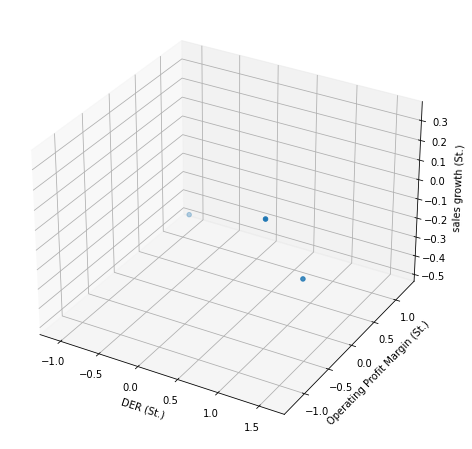

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = [-1.0747699 ,  1.60761561,  1.45000206]
y = [ 1.25270712, -0.73415244, -1.22811141]
z = [-0.47688144, -0.04643691,  0.33540692]

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("sales growth (St.)")
ax.scatter(x, y, z)
plt.show()

In [32]:
#Highly Positively Impacted
df[df['Category'] == 4].describe() 

,Category,DER (St.),Operating Profit Margin (St.),sales growth (St.),DER,Operating Profit Margin,return of asset
count,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,4.0,1.606682,-1.706279,-1.325167,0.621339,-0.587859,-0.000922
std,0.0,1.561843,1.567819,0.523893,0.619179,1.238782,0.075120
min,4.0,0.694736,-3.347827,-1.849993,0.000834,-2.007213,-0.059932
25%,4.0,0.704971,-2.447213,-1.586644,0.312417,-1.019600,-0.043204
50%,4.0,0.715206,-1.546598,-1.323296,0.624000,-0.031987,-0.026476
75%,4.0,2.062655,-0.885505,-1.062754,0.931592,0.121818,0.028582
max,4.0,3.410104,-0.224411,-0.802212,1.239184,0.275624,0.083640


In [33]:
#Highly Positively Impacted
df[df['Category'] == 3].describe() 

,Category,DER (St.),Operating Profit Margin (St.),sales growth (St.),DER,Operating Profit Margin,return of asset
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#Highly Positively Impacted
df[df['Category'] == 2].describe() 

,Category,DER (St.),Operating Profit Margin (St.),sales growth (St.),DER,Operating Profit Margin,return of asset
count,14.0,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2.0,-0.436716,0.307904,0.061258,1.986223,0.095917,0.054839
std,0.0,0.281829,0.426912,0.430486,2.846352,0.337944,0.128072
min,2.0,-1.157119,-0.445530,-0.885094,0.000624,-0.980925,-0.178472
25%,2.0,-0.574439,0.189473,-0.068037,0.543356,0.051778,0.031135
50%,2.0,-0.398247,0.375532,0.136258,0.892821,0.172038,0.055165
75%,2.0,-0.283775,0.499627,0.329553,1.593823,0.233867,0.077902
max,2.0,-0.021584,1.210151,0.682278,10.614012,0.458206,0.405886


In [35]:
#Highly Positively Impacted
df[df['Category'] == 1].describe() 

,Category,DER (St.),Operating Profit Margin (St.),sales growth (St.),DER,Operating Profit Margin,return of asset
count,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,1.0,1.293972,0.808185,3.117884,3.517208,-0.412206,-0.116518
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,1.293972,0.808185,3.117884,3.517208,-0.412206,-0.116518
25%,1.0,1.293972,0.808185,3.117884,3.517208,-0.412206,-0.116518
50%,1.0,1.293972,0.808185,3.117884,3.517208,-0.412206,-0.116518
75%,1.0,1.293972,0.808185,3.117884,3.517208,-0.412206,-0.116518
max,1.0,1.293972,0.808185,3.117884,3.517208,-0.412206,-0.116518


In [36]:
#Highly Positively Impacted
df[df['Category'] == 0].describe() 

,Category,DER (St.),Operating Profit Margin (St.),sales growth (St.),DER,Operating Profit Margin,return of asset
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN
